In [23]:
!pip install streamlit

In [24]:
!pip install pandas

In [25]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [26]:
!pip install numpy

In [27]:
!pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [28]:
import streamlit as st
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [29]:
df = pd.read_csv(r'C:\Users\Abhishek Tiwari\Downloads\diabetes.csv')

In [30]:
# HEADINGS
st.title('Diabetes Checkup')
st.sidebar.header('Patient Data')
st.subheader('Training Data Stats')
st.write(df.describe())

In [31]:
# X AND Y DATA
x = df.drop(['Outcome'], axis = 1)
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)


In [32]:
# FUNCTION
def user_report():
  pregnancies = st.sidebar.slider('Pregnancies', 0,17, 3 )
  glucose = st.sidebar.slider('Glucose', 0,200, 120 )
  bp = st.sidebar.slider('Blood Pressure', 0,122, 70 )
  skinthickness = st.sidebar.slider('Skin Thickness', 0,100, 20 )
  insulin = st.sidebar.slider('Insulin', 0,846, 79 )
  bmi = st.sidebar.slider('BMI', 0,67, 20 )
  dpf = st.sidebar.slider('Diabetes Pedigree Function', 0.0,2.4, 0.47 )
  age = st.sidebar.slider('Age', 21,88, 33 )

  user_report_data = {
      'pregnancies':pregnancies,
      'glucose':glucose,
      'bp':bp,
      'skinthickness':skinthickness,
      'insulin':insulin,
      'bmi':bmi,
      'dpf':dpf,
      'age':age
  }
  report_data = pd.DataFrame(user_report_data, index=[0])
  return report_data

In [33]:
# PATIENT DATA
user_data = user_report()
st.subheader('Patient Data')
st.write(user_data)

In [34]:
# MODEL
rf  = RandomForestClassifier()
rf.fit(x_train, y_train)
user_result = rf.predict(user_data)

c:\Users\Abhishek Tiwari\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age
- bmi
- bp
- dpf
- glucose
- ...
Feature names seen at fit time, yet now missing:
- Age
- BMI
- BloodPressure
- DiabetesPedigreeFunction
- Glucose
- ...

  warnings.warn(message, FutureWarning)


In [35]:
# VISUALISATIONS
st.title('Visualised Patient Report')


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [36]:
# COLOR FUNCTION
if user_result[0]==0:
  color = 'blue'
else:
  color = 'red'


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

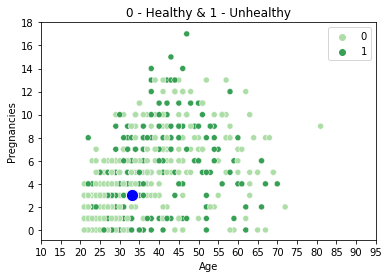

In [37]:
# Age vs Pregnancies
st.header('Pregnancy count Graph (Others vs Yours)')
fig_preg = plt.figure()
ax1 = sns.scatterplot(x = 'Age', y = 'Pregnancies', data = df, hue = 'Outcome', palette = 'Greens')
ax2 = sns.scatterplot(x = user_data['age'], y = user_data['pregnancies'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,20,2))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_preg)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

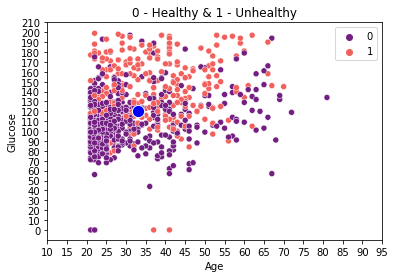

In [38]:
# Age vs Glucose
st.header('Glucose Value Graph (Others vs Yours)')
fig_glucose = plt.figure()
ax3 = sns.scatterplot(x = 'Age', y = 'Glucose', data = df, hue = 'Outcome' , palette='magma')
ax4 = sns.scatterplot(x = user_data['age'], y = user_data['glucose'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,220,10))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_glucose)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

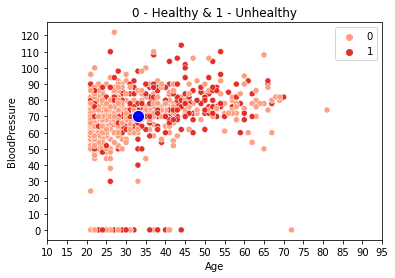

In [39]:
# Age vs Bp
st.header('Blood Pressure Value Graph (Others vs Yours)')
fig_bp = plt.figure()
ax5 = sns.scatterplot(x = 'Age', y = 'BloodPressure', data = df, hue = 'Outcome', palette='Reds')
ax6 = sns.scatterplot(x = user_data['age'], y = user_data['bp'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,130,10))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_bp)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

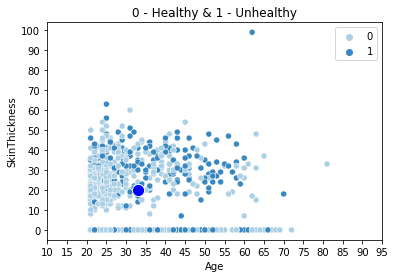

In [40]:
# Age vs St
st.header('Skin Thickness Value Graph (Others vs Yours)')
fig_st = plt.figure()
ax7 = sns.scatterplot(x = 'Age', y = 'SkinThickness', data = df, hue = 'Outcome', palette='Blues')
ax8 = sns.scatterplot(x = user_data['age'], y = user_data['skinthickness'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,110,10))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_st)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

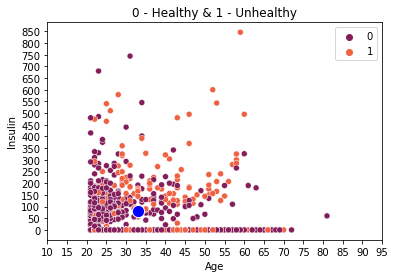

In [41]:
# Age vs Insulin
st.header('Insulin Value Graph (Others vs Yours)')
fig_i = plt.figure()
ax9 = sns.scatterplot(x = 'Age', y = 'Insulin', data = df, hue = 'Outcome', palette='rocket')
ax10 = sns.scatterplot(x = user_data['age'], y = user_data['insulin'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,900,50))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_i)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

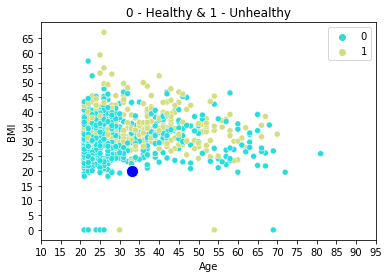

In [42]:
# Age vs BMI
st.header('BMI Value Graph (Others vs Yours)')
fig_bmi = plt.figure()
ax11 = sns.scatterplot(x = 'Age', y = 'BMI', data = df, hue = 'Outcome', palette='rainbow')
ax12 = sns.scatterplot(x = user_data['age'], y = user_data['bmi'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,70,5))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_bmi)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

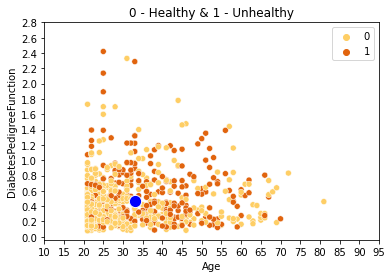

In [43]:
# Age vs Dpf
st.header('DPF Value Graph (Others vs Yours)')
fig_dpf = plt.figure()
ax13 = sns.scatterplot(x = 'Age', y = 'DiabetesPedigreeFunction', data = df, hue = 'Outcome', palette='YlOrBr')
ax14 = sns.scatterplot(x = user_data['age'], y = user_data['dpf'], s = 150, color = color)
plt.xticks(np.arange(10,100,5))
plt.yticks(np.arange(0,3,0.2))
plt.title('0 - Healthy & 1 - Unhealthy')
st.pyplot(fig_dpf)

In [44]:
# OUTPUT
st.subheader('Your Report: ')
output=''
if user_result[0]==0:
  output = 'You are not Diabetic'
else:
  output = 'You are Diabetic'
st.title(output)
st.subheader('Accuracy: ')
st.write(str(accuracy_score(y_test, rf.predict(x_test))*100)+'%')